<a href="https://colab.research.google.com/github/DamienSmith/UTS_ML2019_ID13039957/blob/master/A2_PracticalProject_13039957_13026998.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A2: Algorithm Implementation | 31005 | Advanced Data Analytics
Student: 13039957 & 13026998

Link to Github:
https://github.com/DamienSmith/UTS_ML2019_ID13039957/blob/master/A2_PracticalProject_13039957_13026998.ipynb

Video url: https://youtu.be/mEefphtMhcc

##Introduction - a project overview


**The Decision Tree (CART) Algorithm** 

A decision tree is a decision support tool that models possible outcomes based on a number of conditions (Singh & Gupta 2014). Starting with a root node, an algorithm is applied that splits into additional nodes recursively resulting in a workflow that predicts an outcome (Peng, Chen & Zhou 2009). Common decision tree algorithms include Iterative Dichotomiser (ID3) and Classification and Regression Trees (CART) which use different splitting criteria to determine a score that identifies the best way to split a dataset (Singh & Gupta 2014).

For this project, the CART algorithm was implemented from scratch using Python 3. The representation of the CART model is a binary tree where each node can have zero, one or two child nodes (Brownlee 2016). All input variables and all possible split points are evaluated and chosen in a greedy manner based on the Gini impurity function. The Gini impurity provides a purity score representing the miss-classification rate within a dataset. A split is made on the best score at each level of depth. Splitting continues until a stopping condition is reached such as nodes contain a minimum number of training examples or a maximum tree depth is reached. Once created, a tree can be navigated by following the rules at each branch until a final prediction is reached.

CART has the following advantages and disadvantages (Timofeev 2004) & (Singh & Gupta 2014):

Advantages:
* CART can handle both numerical and categorical variables.
* CART algorithm will identify the most significant variables.
* CART can handle outliers.

Disadvantages:
* CART may have unstable decision tree. Minor modification such as changes in splitting variables and values can greatly increase or decrease tree complexity. 
* CART can only split by one variable.


**Define Input/Output** 

This algorithm was designed to handle any dataset that includes features and target columns with numeric values. The target column needs to contain only one value (i.e. not a multivariable entry). For this reason, we have imported the sklearn dataset library to provide the user input to experiment with that meet these requirements.  Note, that the dataset is turned into a Panda dataframe. Pandas is a Python library providing integrated, intuitive routines for performing common data manipulations and analysis on data sets (McKinney 2011). The provided code will convert the sklearn database into a pandas dataframe and build a decision tree based on the maxdepth inputted by the users. After running the algorithm, the decision tree and the predicted value of each tested instance will be printed in the command line.


##Exploration

**Practical Significance**

Decision trees are practically significant as they are intuitively understood by laypeople such as stakeholders. This makes it a useful tool for explanation purposes. They also form a foundational part of understanding machine learning. 

The implementation of the CART decision tree algorithm is a practically significant project because it represents the value of decision tree learning. These include:

1.   Demonstrating the generalization of unobserved instances (when described in terms of features that are correlated with a target class).
2. Demonstrating that the computation efficiency is proportional to the number of observed training instances (the size of the dataset).
3.   Demonstrating that a decision tree model as an intuitive classification process that is relatively easy to understand (e.g. doctors use it when diagnosing patients).


**Challenges**

The following challenges were encountered when designing our decision tree, and implementing the solution:

* Dataset Selection

A challenge faced was having an appropriate dataset to use for training the CART decision tree. This was solved by using sklearn database datasets that meet the requirements for implementing the algorithm. As is expected, this project cannot handle multivariable data as this is a known limitation of CART.

* Finding the best split

Originally the net sum of the gini impurity at each split point was calculated by summing the gini impurity of both the left and right side of each possible split. We found that although it performed well for some splits,  it would start to favour ‘edge’ cases; i.e. choosing a split close to an end point since that would give the best ‘net’ impurity. This was solved by implementing a weighted net gini impurity. This was calculated based on the proportion of data points remaining in each split point/leaf. This weighted calculation gave less importance to edge cases and improved the quality of splitting.

* Training Storage

Another challenge faced was how to ‘store’ the structure of the decision tree. It was easy to identify how to do each split and draw the tree manually, however, putting that information into Python proved difficult. 

The first approach was a ‘test’ row would be stored, and then tested simultaneously as the tree was created. This would have been disastrous for performance, however, since every entry would have a new tree created. 

We solved this by storing the tree model into a Python dictionary, storing every possible node value. For example at depth 1, we created a dictionary containing 2 sets of nodes with all possible outcomes. For depth 2, we created 4, and for depth 3 we’d create 8. This proved effective as we are able to see a ‘complete’ and symmetrical tree,  however it is also exponentially taxing, computationally as the depth increases.

* Predicting & Pruning

Knowing when the decision tree should ‘commit’ to a prediction was a challenge. It was decided that the algorithm should make a ‘decision’ if there was only one target value remaining for a particular leaf. For example, with the Iris data set, splitting at Petal Length <= 1.9, resulted in only 0 or ‘Setosa’ Irises left. Further improving this, a decision was set to be made when the max depth parameter was met. Note that if more than one target value remained on a leaf node the target value with the highest mode, and if the mode was equal, the first entry would be selected as the decision. 

This might still lead to challenges if depth is increased too much, causing overfitting to become more prominent since it may split when only one target data point remains. 
Pruning also provided a challenge as there is no way to check when to stop pruning. The algorithm required manual observation to determine the best depth to ‘prune’ the tree. This project kept to a ‘max depth’ method that requires ‘trial and error’ in order to check each depth for meaningful predictions.. 



**Design Data Structures**

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. When planning the algorithm implementation we started with the maths that defined how to calculate the best split points (Hastie et al 2008, at p 308). 

It was decided to use the gini impurity to determine impurity since we had a classification (as opposed to a regression) problem, and gini impurity was the more appropriate measure of impurity as it was differentiable, sensitive to change and was intuitively understood (Hastie et al 2008, at p 310). 

We also decided to do binary splits rather than multiway splits as we didn’t want to split the data too quickly, especially since datasets like the Iris set did not have a huge amount of data to split. 

When determining the decision node, we decided that unique value as a deciding factor mixed with a maximum depth would be appropriate, especially upon a visual inspection of the Iris data set. Other options such as a minimum impurity level or working out smoothness or linear combination splits seemed unnecessarily complex for our given data. 


* data acquisition

The Scikit-learn library provides datasets, for example the iris and wine datasets for classification and the boston house prices dataset for regression (Louppe 2016). Each dataset is a Python dictionary-like object that holds all the data and some metadata about the data. This data is stored in the data member, which is a n_samples and n_features array.

In the case of supervised problem, one or more response variables are stored in the target member. This is the number corresponding classification that we are trying to learn.
For each dataset, the.data member gives access to the features that can be used to classify the digits

* quality control

Quality control refers to the state of completeness, conformity, consistency, timeliness, duplication, integrity, and accuracy that makes data appropriate for a specific use (Strong, Lee. & Wang 1997). For the purpose of simplification, the sklearn database library has been used as a way to manage the data quality of each dataset. Each dataset  is provided in identical format, which has allowed the focus of the project to be on the algorithm implementation and streamline a common standard of data input.

* modelling techniques

The decision tree was modeled into a series of python dictionaries, which represented nodes of a tree. Each dictionary holds relevant information of the depth, decision, feature, value and right/left value for each node. Each level of depth was used as a reference and further rules applied if ‘decision’ was none. The right left value is used to determine if the value is greater than or less than.

An example of a python dictionary decision tree model on the iris dataset after running subsequent_split(df, 1, 3)

      {1: {'decision': 0,

           'feature': 'petal length (cm)',
           'side': 'left',
           'value': 1.9},

       2: {'decision': None,
           'feature': 'petal length (cm)',
           'side': 'right',
           'value': 1.9}}

      {1: {0},

        2: {0},

       3: {'decision': 1,

           'feature': 'petal width (cm)',
           'side': 'left',
           'value': 1.7},

       4: {'decision': 1,
           'feature': 'petal width (cm)',
           'side': 'right',
           'value': 1.7}}

      {}

CART is characterized by it construction of binary trees where each internal node has exactly two outgoing edges (Breiman et al. 1984). The splits for our implementation are selected by finding the lowest weighted net impurity score on features as the splitting criteria. The prediction in each leaf is based on the weighted mode for a node.

* Split Calculations:

* Gini Impurity: 

${\displaystyle 1 – \sum _{i \neq j}(P_{i}P_{j})^2}$

* Weighted net impurity: 

sum of the impurity of the left and right leaves weighted by the proportion of data points on the respective side. 

* Evaluation Method: 

If predicted value is equal to the target value than it is correct.
The details of its implementation is covered in the methodology section of this report.

The details of its implementation is covered in the methodology section of this report.

**Plan Data Models and Tests**

The project is designed to work in Google Colaboratory (Colab). Colab is a cloud service based on Jupyter Notebooks for disseminating machine learning education and research (Carneiro et al 2018). The comments in the code guide the user through the code logic.

As a user of the code, you are invited to input different sklearn databases through the dropdown menu provided. A user can also enter the maximum depth of a tree by inputting it into the subsequent_split() function. After building a model, a user can input test data that has automatically been split off the input dataset. Running the testDataAccuracy() function will test the performance of the model and provide an overall accuracy score.


**Possible alternatives**

A number of possible alternatives presented themselves while researching decision tree implementation, these include:

* **Impurity functions:** Use additional impurity functions such as cost function/entropy to see which is the most appropriate impurity function for a given data set.

* **Tree Pruning.** An important technique for reducing overfitting of the training dataset is to prune the trees.  The algorithm currently determines a maximum tree depth manually, however with methods such as grid searching, a better method to determine the optimal tree depth could be made.

* **Terminal nodes.** Alternative methods for splitting the data could be made such as minimum impurity levels, having a minimum observation requirement for a terminal node or maximum number of possible nodes.

* **Algorithm Tuning:** experimenting with different parameter to achieve better performance, such as weighing a minimum classes (if the dataset was not balanced)


* **Categorical Dataset.** The example was designed for input data with numerical or ordinal input attributes. Whilst a data set should optimally be cleaned to only contain numerical data, the algorithm could be expanded to be more flexible with messy data such as dealing with categorical input data or missing data.


* **Different datasets.** The algorithm fits relatively well with the Iris dataset, however alternatives could be done to include more datasets


##Methodology


The general method we undertook when creating the devision tree algorithm was as follows:


1.   Input dataset (sklearn database):

  1.1   Ensure that the dataset was cleaned and contains non-categorical data; and
  
  1.2  Split into training/testing dataset.


2.   For every feature in the training dataset:

  2.1 Select each value for each feature in the dataset;
  
  2.2 Calculate gini index for the left (less than and equal to) and right (greater than) side of each of these values for that feature;
  
  2.3 Calculate the ‘weight’ of number of targets for each side of split; 
  
  2.4 Pick the best weighted net gini score (lowest score);
  
  2.5 Split dataset and start the next ‘depth’ layer; and 
  
  2.6 storing the node/split decision in a dictionary.

3. Loop this feature selection and splitting until:

    3.1 Max depth reached; or 
 
    3.2 Only unique target values remain in split dataset; otherwise

    3.3 Continue splitting.

4. When predicting, for every row in testing dataset


    4.1 Test features against decision tree dictionary for each relevant depth
    4.2 Print row and predicted value
    4.3 Print overall prediction accuracy


Additional explanation can be found in the comments
 
Gini Impurity calculation:

*   for each class:
  * Calculate probability of class in the given branch.
  * Square the class probability.
*   Sum the squared class probabilities
  * Subtract the sum from 1.
  * Weight each branch based on the baseline probability.
  * Sum the weighted gini index for each split.

A perfectly classified, Gini Index would be zero. An evenly distributed would be 1 – (1/# Classes). You want a variable split that has a low Gini Index.


## Decision Tree Model

In [0]:
## 
##    A2: Algorithm Implementation | 31005 | Advanced Data Analytics
##    
##    Authors: Rae Ho (13026998) & Damien Smith (13039957)
##    Goals: - Implement Decision Tree Algorithm
##           - Build & Train a model
##           - Explore/Compare different parameters 
##    Code: Python 3
##    Github: https://github.com/DamienSmith/UTS_ML2019_ID13039957/blob/master/A2_PracticalProject_13039957_13026998.ipynb
##
##

In [0]:
#Import Libraries
#numpy to work with arrays
#panda for dataframe 
#sklearn to import iris dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [0]:
#Get data
#using iris data. Get it from sklearn dataset
dataset = datasets.load_iris() #@param ["datasets.load_iris()", "datasets.load_boston()", "datasets.load_diabetes()" , "datasets.load_wine()", "datasets.load_breast_cancer()"]{type:"raw"}

# We want to turn the dataset into a panda dataframe
df = pd.DataFrame(dataset['data'])
X_train, X_test, y_train, y_test = train_test_split(df, df['target'], test_size=0.3, random_state=100)

# We also want to add the names of each feature to the dataframe
df.columns = [name[:] for name in dataset['feature_names']]

#We want to add the target to the dataframe too 
df['target'] = dataset['target']

#this is to create a random sample of 30 entries
testdf = df.sample(n=30, random_state=1).reset_index(drop=True)


# We create target variable (into binary) in order to get a 'count' of all items in the dataframe (in case there are missing values) 
df['dummy'] = 1

In [0]:
#function to return the count of rows in the dataframe that match a condition

def count_target(dframe, right, feature, value):
  #this is to find the impurity to the left of and to the right of a slice on a cartesian plane   
  if right:
    cond = dframe[feature]>value
  else:
    cond = dframe[feature]<=value
  
  #this works by counting the total number of target items, 'mean' helps find probability of correct choice 
  #count = len(dframe[cond])
  count = sum(cond)
  return count

In [0]:
#We want to create a method to determine what the impurity is for any 'slice' of a feature. 
#We have decided to use the gini impurity which shows how likely it is that a randomly selected feature is correctly guessed

##this takes the parameters:
    #dframe which allows you to put in the dataframe you want to find the impurity for
    #right which takes True or False to look at right or left impurity of a split point
    #feature which is the feature (column) that you want to use/look at
    #value which is the value that is to be split at
    #target variable to be determined (which for the iris df we are using is 'target')


#find gini impurity of a slice 
def gini_impurity_leaf(dframe, right, feature, value, target_variable):

#this is to find the impurity to the left of and to the right of a slice on a cartesian plane   
  if right:
    cond = dframe[feature]>value
  else:
    cond = dframe[feature]<=value
  
  #this works by counting the total number of target items, 'mean' helps find probability of correct choice 
  count_of_target = dframe[cond].groupby(target_variable)['dummy'].count()
  #print("count of target is: ")
  #print(count_of_target)
  #this uses the impurity formula of impurity = 1 - sum of (probability of being correct [count/length])^2
  gini_impurity = 1 - (np.divide(count_of_target, len(dframe[cond])) ** 2).sum()
  
  return gini_impurity

In [0]:
#this finds the net gini impurity by adding the left and right slice
# we want to find the 'slice' with the lowest net gini impurity 

def net_gini_impurity(dframe, feature, value, target_variable):  

#  net_gini = gini_impurity_leaf(dframe, True, feature, value, target_variable) + gini_impurity_leaf(dframe, False, feature, value, target_variable) #this didn't work as it would have duplicate values or prefer edge cases
# we had to use a weighted gini index

  right_weight = count_target(dframe, True, feature, value) / len(dframe)
  left_weight = 1 - right_weight
 #print("right weight is:{}".format(right_weight))
  net_gini = (right_weight * gini_impurity_leaf(dframe, True, feature, value, target_variable)) + (left_weight * gini_impurity_leaf(dframe, False, feature, value, target_variable))
  
  return net_gini

In [0]:
# This finds best split 

def find_best_split(dataframe):
# Find the best split by going over every value in each feature and choosing the split with the lowest net impurity
    lowest_impurity = 2  # keep track of the worst impurity
    best_split = ['there is no split', 0]  # keep train of the feature / value that produced it

    
    for f in range(len(dataframe.columns) -2):  # loop through each feature --> the -2 is because it shouldnt look at TARGET and DUMMY
        feat = dataframe.columns[f]             # store the name of the feature as 'feat'
        for val in dataframe[feat].unique():  # loop through each unique value for that feature 
          #Calculate the net impurity of each value in feature
          #print(feat,val)
          net_imp = net_gini_impurity(dataframe, feat, val, 'target')
          #print(feat,val,net_imp)
          split = [feat, val]
          # store best gain and best feature 
          if net_imp < lowest_impurity:
            lowest_impurity = net_imp
            best_split = split
            #print("the current best split is:")
            #print(lowest_impurity,best_split)

    return lowest_impurity, best_split

In [0]:
#this splits a dataframe to right and left sides

def splitter(dframe):
  impurity, featsplit = find_best_split(dframe)
  feature = featsplit[0]
  value = featsplit[1]
  
  #and store the values of those sides into a new data_frame  
  right_split = dframe[dframe[feature]>value]
  left_split =dframe[dframe[feature]<=value]      
  
  #print("I have been split for the feature ", feature, "at value", value)
  
  return right_split, left_split, feature, value

In [0]:
#This returns what the target is
# This returns a predicted value for the terminal node
# The returned value is the end value with the most common end result

#def final_guess(feature, value, dframe, boolean=False):
def final_guess(dframe):

  dataset = dframe
  targets = dataset.target
  outcome = None
  
  outcome = targets.value_counts().idxmax()  #this is the first most common value in that set - so if it's a 50/50 split between two targets, it'll choose the first one.
  
  return outcome

  #alternatively you could do 'outcomes = targets.mode()' but then you wont get a single int if there's multiple values

In [0]:
#this creates an depth of arrays which we use to store values for later predict
#the aim is to create a list of dictionaries to store the trained data

def createDepthArray(maxdepth):
  for i in range(1,maxdepth):
    depth = i
    name = 'depth{}'.format(depth)          #get the name of the dict array

    #populate the array with futher arrays
    if name not in globals():       
      globals()['depth%s' % depth] = {}       #create an array called depth#    
    
    if len(globals()['depth%s' % depth]) < 1:
      for n in range(1, 2**depth + 1):              
        globals()['depth%s' % depth][n] = {}
      #elif name in globals():
      #  print("already exists")

In [0]:
#this helps insert values into the previous 'depth array' parts
def insertNodeValue(depth, number, feature, value, side, guess):     
  #number = getNumberPos(depth)
  globals()['depth%s' % depth][number] = {'feature': feature, 'value': value, 'side': side, 'decision': guess}

In [0]:
#to fill subsequent depths's numbers that already has a final decision   

def depthFiller(depth, outcome, number, maxdepth):
  new_depth = depth+1
  #number = getNumberPos(depth)
  if new_depth < maxdepth:

    #print("i am at position {} and am filling lower depth".format(number))
    number_left = (number*2 - 1)
    number_right = (number * 2)
    globals()['depth%s' % new_depth][number_right] = {outcome}
    globals()['depth%s' % new_depth][number_left] = {outcome}
    #and then repopulate the sub-depths until max-depth
    depthFiller(new_depth, outcome, number_right, maxdepth)
    depthFiller(new_depth, outcome, number_left, maxdepth)

In [0]:
#this returns the next empty number for that depth
def getNumberPos(depth):
  for i in range(1, 2**depth+1):
    if len(globals()['depth%s' % depth][i]) == 0:
      return i
      break
    else:
      continue

In [0]:
#this is the main code that creates the tree by iteratively splitting
#data at the best point

def subsequent_split(dataframe, depth, maxdepth):
  global maxDepth
  maxDepth = maxdepth
  createDepthArray(maxdepth)
  depthspace = "  "*depth
  right_split, left_split, feature, value = splitter(dataframe)
  #create a bunch of dict to max depth
  

  # store:  [number: {feature = '', value ='', side = 'left', decision = 0,1,3,null}]

  if depth < maxdepth:
    #print("I am doing left side")
    
    if left_split.empty:
      print("I am working at depth", depth)
      print("left side is empty")
      
    #this currently looks for a unique value, and if only 1 
    #consider doing a mininum impurity    
    elif len(left_split['target'].unique()) < 2:
      print("{} I am working at depth {}".format(depthspace, depth))
      #print("i am now uniquely left")
      guess = final_guess(left_split)
      print("{} for {} <= {}, we predict {}".format(depthspace, feature, value, guess))
      number = getNumberPos(depth)
      depthFiller(depth, guess, number, maxdepth)
      insertNodeValue(depth, number, feature, value, 'left', guess)

    #if we have reached max depth, then it will predict anyway
    elif depth == maxdepth - 1:
      guess = final_guess(left_split)
      print("{} for {} <= {}, we predict {}".format(depthspace, feature, value, guess))
      number = getNumberPos(depth)
      depthFiller(depth, guess, number, maxdepth)
      insertNodeValue(depth, number, feature, value, 'left', guess)
    
    #else if it hasnt reached max depth, then it will keep splitting
    else:  
      #print(len(left_split['target'].unique()))
      print("{} I am working at depth {}".format(depthspace, depth))
      print("{} i am now branching for {} <= {}".format(depthspace, feature, value))
      number = getNumberPos(depth)
      insertNodeValue(depth, number, feature, value, 'left', None)
      subsequent_split(left_split,depth+1,maxdepth)
     
    #print("I am doing right side")
    if right_split.empty:
      #print("depth is", depth)
      print("right side is empty")  
    
    #checks if theres a unique target left
    elif len(right_split['target'].unique()) < 2:  
      print("{} I am working at depth {}".format(depthspace, depth))
      #print("i am now uniquely right")
      guess = final_guess(right_split)
      print("{} for {} > {}, we predict {}".format(depthspace, feature, value, guess))
      number = getNumberPos(depth)
      depthFiller(depth, guess, number, maxdepth)
      insertNodeValue(depth, number, feature, value, 'right', guess)
    
    #checks if max depth is reached and if so predict
    elif depth == maxdepth - 1:
      guess = final_guess(left_split)
      print("{} for {} > {}, we predict {}".format(depthspace, feature, value, guess))
      number = getNumberPos(depth)
      depthFiller(depth, guess, number, maxdepth)
      insertNodeValue(depth, number, feature, value, 'right', guess)
    
    #else keep splitting
    else:
      #print("depth is", depth)
      print("{} I am now branching for {} > {}".format(depthspace, feature, value))
      number = getNumberPos(depth)
      insertNodeValue(depth, number, feature, value, 'right', None)
      subsequent_split(right_split,depth+1,maxdepth)

In [0]:
#def to clear the dictionary. Needed if we want to re-train/subsequent_split  
def clearTrainedData():
  for n in range(1, maxDepth):              
    globals()['depth%s' % n].clear()

In [0]:
#this is for subsequent predictions after the first depth
def subsequentPredict(test_df_row, number, depth):
  index = number
  depth = depth + 1
  if depth < maxDepth:
    for x in test_df_row.columns:               #for each df header            
      if globals()['depth%s' % depth][index]['feature'] == x:           #to see if feature is same
        dictVal = globals()['depth%s' % depth][index]['value']                # value of depth1      
        for n in range(len(test_df_row[x])):     #loop each index row in testdf        
          rowVal = test_df_row.loc[n, x ]   #store the value for that row
      
          if globals()['depth%s' % depth][index]['side'] == 'right':      # if depth entry is left or right
            if rowVal > dictVal:
              if globals()['depth%s' % depth][index]['decision'] is not None:
                print("the prediction is {}".format(globals()['depth%s' % depth][index]['decision']))
              else:
                #print("need to continue")
                subsequentPredict(test_df_row, index*2 - 1, depth)
                subsequentPredict(test_df_row, index*2, depth)
                
          if globals()['depth%s' % depth][index]['side'] == 'left':      # if depth entry is left or right   
            if rowVal <= dictVal:
              if globals()['depth%s' % depth][index]['decision'] is not None:
                print("the prediction is {}".format(globals()['depth%s' % depth][index]['decision']))
              else:
                #print("need to continue")
                subsequentPredict(test_df_row, index*2 - 1, depth)
                subsequentPredict(test_df_row, index*2, depth)
  #else:
  #  print("reached max depth already")

In [0]:
def firstPredict(test_df_row):
  for x in test_df_row.columns:               #for each df header
    for i in range(1,len(depth1)+1):          #loop through each dict key
      if depth1[i]['feature'] == x:           #to see if feature is same
        #print("feature to look over is{}".format(x))
        dictVal = depth1[i]['value']                # value of depth1
        #print("dictval is {}".format(dictVal))
        #print(type(dictVal))
        
        for n in range(len(test_df_row[x])):     #loop each index row in testdf        
          rowVal = test_df_row.loc[n, x ]   #store the value for that row
          #print("rowVal is {}".format(rowVal))
          #print(type(rowVal))
          #print(depth1[i]['side'])
          
          if depth1[i]['side'] == 'right':      # if depth1 entry is left or right
            if rowVal > dictVal:
              #print("Row Val is greater than DictVal")
              if depth1[i]['decision'] is not None:
                print("the prediction is {}".format(depth1[i]['decision']))
              elif depth1[i]['decision'] is None:
                #print("need to continue")
                subsequentPredict(test_df_row, i*2 - 1, 1)
                subsequentPredict(test_df_row, i*2, 1)
            #else:
            #  print("rowVal does not match this node")
          
          if depth1[i]['side'] == 'left':      # if depth1 entry is left or right   
            if rowVal <= dictVal:
              #print("Row Val is less than DictVal")
              if depth1[i]['decision'] is not None:
                print("the prediction is {}".format(depth1[i]['decision']))
              elif depth1[i]['decision'] is None:
                #print("need to continue")
                subsequentPredict(test_df_row, i*2 - 1, 1)
                subsequentPredict(test_df_row, i*2, 1)

In [0]:
#this is to test each row of the inputed dataframe
def testData(dataframe):
  testdata = dataframe
  
  for i in range(len(testdf)):
    testrow = testdata[:1]
    print("for the row:")
    print(testrow.to_string(index=False))
    firstPredict(testrow)
    testdata = testdata.drop([0,0]).reset_index(drop=True)
    print("\n")

In [0]:
#this tests each row but can work out accuracy when the target value is known 
def testDataAccuracy(dataframe):
  from io import StringIO  # Python3
  import sys
  
  testdata = dataframe
  count = 0
  correct = 0
  for i in range(len(testdf)):
    testrow = testdata[:1]
    print("for the row:")
    print(testrow.to_string(index=False))
    test = testrow['target'].values[0] 
    print("the correct value was {}".format(test))
    firstPredict(testrow)
    
    old_stdout = sys.stdout
    result = StringIO()
    sys.stdout = result
    firstPredict(testrow)
    sys.stdout = old_stdout
    
    result_string = result.getvalue()
    a, b, c, last = result_string.split()
    #guess = int(last)
    #print("last is {}".format(last))
    count = count + 1
    if str(test) == str(last):
      correct = correct + 1
      print ("I predicted correctly")
    else:
      print("I was wrong")
    testdata = testdata.drop([0,0]).reset_index(drop=True)
    print("\n")
  print("Total rows was {} and I predicted {} correctly".format(count, correct))
  print("My accuracy is {}%".format(correct/count * 100))

In [0]:
####################################################
#######this is where we finally call things ########
####################################################

In [0]:
#You will need to clear the training data if you want to 'train' different data
try: 
  clearTrainedData()
except:
  print("nothing to clear")

In [0]:
#this is to build the tree
#the first parameter is the training dataframe
#the second parameter is the depth to start at, which is always 1
#the third parameter is the max depth you want to trim the decision tree to
subsequent_split(df, 1, 5)    #put 1 more than the max depth you want

In [0]:
# when you have the target variable in the testing data you can check
# the accuracy of the data
testDataAccuracy(testdf)

In [0]:
# when you dont have the target variable in the testing data you can check
# the prediction
testData(testdf)

In [0]:
# you can print the dictionaries for each depth of the tree (as you desire)
import pprint
pprint.pprint(depth1)
pprint.pprint(depth2)
pprint.pprint(depth3)
pprint.pprint(depth4)
pprint.pprint(depth5)

##Evaluation


**Report Execution on Data**

Report Execution on Data
When executing the code, we store the decision tree into a series of dictionaries that record the depth, feature, value, left (less than or equal to value) /right (greater than value) and prediction (None if not a leaf node). 

An example output from running the subsequent_split() method with a max depth of 4 on the iris dataset prints the following output:

    I am working at depth 1
       for petal length (cm) <= 1.9, we predict 0
     I am now branching for petal length (cm) > 1.9
       I am working at depth 2
       i am now branching for petal width (cm) <= 1.7
         I am working at depth 3
         i am now branching for petal length (cm) <= 4.9
           I am working at depth 4
           for petal width (cm) <= 1.6, we predict 1
           I am working at depth 4
           for petal width (cm) > 1.6, we predict 2
         I am now branching for petal length (cm) > 4.9
           I am working at depth 4
           for petal width (cm) <= 1.5, we predict 2
           for petal width (cm) > 1.5, we predict 2
       I am now branching for petal width (cm) > 1.7
         I am working at depth 3
         i am now branching for petal length (cm) <= 4.8
           I am working at depth 4
           for sepal length (cm) <= 5.9, we predict 1
           I am working at depth 4
           for sepal length (cm) > 5.9, we predict 2
         I am working at depth 3
         for petal length (cm) > 4.8, we predict 2
 
For each split we see the depth of the decision tree, the rule being created and predicted target value (if exists).

In order to highlight the splits being made, below is the first split value rule. 

    I am working at depth 1
     for petal length (cm) <= 1.9, we predict 0
   
We see that if petal length (cm) is below 1.9 it is predicted to be target value 0. When plotting the values on a scatter graph below, we see that target value 0 (red) is clustered below petal length (cm) 1.9.

(Please run the code block below)

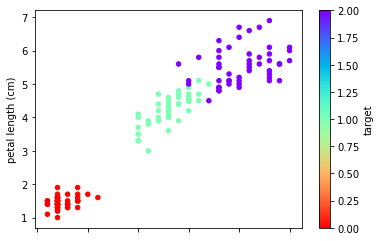

In [3]:
#Run this for the scatter plot highlighting the split value

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()

df = pd.DataFrame(dataset['data'])
df.columns = [name[:] for name in dataset['feature_names']] 
df['target'] = dataset['target']
df.plot.scatter(x ='petal width (cm)', y='petal length (cm)', c='target', colormap='rainbow_r')




**Report Testing**

When evaluating the success of the CART decision tree model, we have the ability  to compare the actual and predicted target variable of each dataset instance. An example output is as follows:
 
    For a Correctly predicted row
    for the row:
    sepal length(cm)  sepal width(cm)  petal length(cm)  petal width(cm)  target
          6.1               2.8                4.7              1.2          1
    the correct value was 1
    the prediction is 1
    I predicted correctly

    For an Incorrectly predicted row
    for the row:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
          6.3                 2.5                5.0               1.9            2
    the correct value was 2
    the prediction is 1
    I was wrong
 
After each row displayed, a final accuracy score is printed

    Total rows was 30 and I predicted 24 correctly
    My accuracy is 80.0%

We can clearly see that if the target and prediction value match. A simple percentage calculation is used to calculate accuracy:

(number of correct predictions) / (total instances) * 100
 
Overall accuracy is an appropriate metric for the Iris dataset since the target variable is balanced across the three classes.  For other datasets, different performance metrics may be needed.


**Efficiency Analysis**

When comparing the computation run time between each dataset, we can observe how the size of the dataset is proportional to the number of observable features.
The following test demonstrates how the number of rows and columns affect the CPU runtime in google Colab. With the ‘%timeit’ command we can track the time it takes to build a decision tree for each available dataset. It can be seen that the more rows and columns (with equal depth) increases the CPU runtime.


In [30]:
# run this code to see the %timeit efficiency analysis table
import pandas as pd
import numpy as np

df = pd.DataFrame(columns = ["Dataset (sklearn.database) ", "Rows (Instances)", "Columns (features)", "MaxDepth", "CPU runtime (%time)"], 
                  data=[["iris", 150, 4, 5, "total: 2.08 s"],
                        ["wine", 178, 13, 5, "total: 25.3 s"],
                        ["diabetes", 442, 10, 5, "total: 31.9 s"],
                        ["boston", 506, 13, 5, "total: 55.3 s"],
                        ["breast_cancer", 569, 30, 5, "total: 4min 58s"]])

df

,Dataset (sklearn.database),Rows (Instances),Columns (features),MaxDepth,CPU runtime (%time)
0,iris,150,4,5,total: 2.08 s
1,wine,178,13,5,total: 25.3 s
2,diabetes,442,10,5,total: 31.9 s
3,boston,506,13,5,total: 55.3 s
4,breast_cancer,569,30,5,total: 4min 58s


It is quite intuitive to understand that more data would equal more computation time. It is worth noting, however, that the number of features scales the time significantly more than the number of rows. This is due to the need to consider each feature across each row for the best possible split point and therefore requires more computation.

## Conclusion


* Discuss Reflections

The implementation of the CART decision tree algorithm has demonstrated how to generalize classification of instances based on features being correlated to a target class. In statistics, overfitting is the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to predict future observations reliably (Tetko et all 1995). The problem of overfitting is identified and proposed to be managed through or generalization (Friedman 1999). 

This project allows a user to experiment with the tree depth and how it affects the accuracy of a prediction.This highlights the effect of depth control as a requires management in order to avoid overfitting and maintain generalization.

The computation efficiency has also been demonstrated showing that cpu run time  is proportional to the number of instances, features and depth. This project implementation may not be the most efficient method but it highlights the impact of datasets with different number of rows and features. This can be further explored with the maxdepth parameter and observe its effect. In our learnings we discovered using a class instead of a dictionary would improve computational efficiency.


* Propose Possible Improvements

A number of possible improvements have been identified that if implemented would improve the performance and efficiency of the code. Firstly, if we defined a ‘node’ class instead of using dictionaries the performance would increase exponentially due to the fact that we store all previous dictionary entries into each subsequent dictionary depth. 

Another improvement would be implementing other splitting criteria (e.g. entropy & information gain) so that comparisons can be made between their performance. If additional user parameters were included that improved experimentation, such as pruning or setting a gini impurity threshold greater generalization could be achieved. 

Further methods could also be implemented to work out the optimal depth of the tree than manually determining it, such as doing a grid search. 

If the algorithm is implemented on different data sets, which are not as balanced as the Iris dataset, further improvements could be made by weighing the minority class more heavily.
Also, this CART decision tree implementation could be expanded into a random forest algorithm (or gradient boosted tree) by iterating a number of tree builds and picking the best scores for a better chance at building a more accurate model.

Finally, the test data was taken as a subset of the training data. Ideally, these should be independent of each other. For demonstration purposes we did not split, and as such the results are over-fitted, but nonetheless currently shows a demonstration of the algorithm working. 




## Ethical (200)

* Discuss the social/ethical aspect of the project

Ethics refer to the principles of right and wrong that individuals use to make choices that
guide their behaviors (Wiley 2017). The CART decision tree implementation project adopts the utilitarianism model, which aims to do what causes the most good for the most people (Anderson & Anderson 2011). This approach is designed into the algorithm by making decisions based on the best possible split point and aims to guide the user on the potential classification of an instance based on historically observed features.

* Consider how the technique could be misused

The algorithm could be misused if a user considers the output as an absolute truth. If the predicted target value was to be treated as evidence for future decisions it has the potential to be misguided due to the probabilistic nature of how a prediction is made (Willis 2014). This can be especially pronounced when used by users less well versed with the algorithm, such as with higher management or stakeholders. Such users will easily comprehend how the decision tree works, but may apply hard and fast rules to something which should have such rules.

The algorithm can also lead to socially unacceptable generalisations and biasedness, such as making decisions based on race, sex or religion. This can cause certain features to be prejudicial when making decisions. This can cause further dilemmas such as whether a data scientist should use such discriminatory features when classifying data (e.g. is it ethical that race be a feature in determining fraud?). 

Ultimately, decisions may be being made without considering unobserved features that would contribute greatly to future classifications. For example, it might not be race being the determinative of crime rates, but socio-economic backgrounds. With the algorithm, the generalisations of features may not be adequately showing this.

## Video Pitch

Video url: https://youtu.be/mEefphtMhcc



## References

Anderson, M. and Anderson, S.L. eds., 2011. Machine ethics. Cambridge University Press.

Breiman, L., Friedman, J., Olshen, R. and Stone, C., 1984. Classification and regression trees. Wadsworth Int. Group, 37(15), pp.237-251.

Brownlee, J., 2016. Master Machine Learning Algorithms: discover how they work and implement them from scratch. Machine Learning Mastery.

Carneiro, T., Da Nóbrega, R.V.M., Nepomuceno, T., Bian, G.B., De Albuquerque, V.H.C. and Reboucas 

Filho, P.P., 2018. Performance Analysis of Google Colaboratory as a Tool for Accelerating Deep Learning Applications. IEEE Access, 6, pp.61677-61685.

Friedman, J.H., 1999. Greedy function approximation: a gradient boosting machine. Annals of statistics, pp.1189-1232.

Hastie, T., Tibshirani, R., Friedman, J. and Franklin, J., 2005. The elements of statistical learning: data mining, inference and prediction. The Mathematical Intelligencer, 27(2), pp.83-85.

Louppe, G., 2016. An introduction to Machine Learning with Scikit-Learn.

McKinney, W., 2011. pandas: a foundational Python library for data analysis and statistics. Python for High Performance and Scientific Computing, 14.

Peng, W., Chen, J. and Zhou, H., 2009. An implementation of ID3-decision tree learning algorithm. From web.arch.usyd.edu.au/wpeng/DecisionTree2.pdf viewed 21/09/2019

Singh, S. & Gupta, P., 2014. Comparative study ID3, cart and C4. 5 decision tree algorithm: a survey. International Journal of Advanced Information Science and Technology (IJAIST), 27(27), pp.97-103.

Strong, D.M., Lee, Y.W. and Wang, R.Y., 1997. Data quality in context. Communications of the ACM, 40(5), pp.103-110.

Tetko, I.V., Livingstone, D.J. and Luik, A.I., 1995. Neural network studies. 1. Comparison of overfitting and overtraining. Journal of chemical information and computer sciences, 35(5), pp.826-833.

Timofeev, R., 2004. Classification and regression trees (CART) theory and applications. Humboldt University, Berlin.

Wiley J. & Sons, Inc. 2017, ‘Management Information Systems’, Chapter 6, p2.

Willis, J.E., 2014. Learning analytics and ethics: A framework beyond utilitarianism. Educause Review.

